Car data = https://www.kaggle.com/CooperUnion/cardataset

CODE


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [34]:
df.sample(7)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2466,Dodge,Challenger,2017,regular unleaded,375.0,8.0,MANUAL,rear wheel drive,2.0,High-Performance,Large,Coupe,23,15,1851,35890
4150,Cadillac,Escalade,2015,flex-fuel (unleaded/E85),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Flex Fuel,Luxury,Performance",Large,4dr SUV,21,15,1624,80195
10164,Toyota,T100,1998,regular unleaded,190.0,6.0,MANUAL,four wheel drive,2.0,NaN,Large,Extended Cab Pickup,18,15,2031,3480
7305,Honda,Odyssey,2016,regular unleaded,248.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Large,Passenger Minivan,28,19,2202,29400
8365,Ford,Ranger,2011,regular unleaded,143.0,4.0,MANUAL,rear wheel drive,2.0,NaN,Compact,Regular Cab Pickup,27,22,5657,19120
1055,Audi,A3,2017,premium unleaded (recommended),220.0,4.0,AUTOMATED_MANUAL,all wheel drive,2.0,Luxury,Compact,Convertible,34,25,3105,49250
7751,Audi,Q3,2015,premium unleaded (recommended),200.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,29,20,3105,36400


In [5]:
print(df.shape)

(11914, 16)


In [6]:
print(df['Make'].value_counts())

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Bugatti   

In [7]:
new_df = df[df['Make']=='Mercedes-Benz']

In [8]:
print(new_df.shape)

(353, 16)


In [9]:
print(new_df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            1
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [10]:
new_df = new_df.dropna()

In [11]:
new_df.shape

(352, 16)

In [12]:
new_df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [13]:
new_df.sample(7)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
602,Mercedes-Benz,560-Class,1991,regular unleaded,238.0,8.0,AUTOMATIC,rear wheel drive,2.0,Luxury,Large,Coupe,16,12,617,2443
3704,Mercedes-Benz,E-Class,2016,diesel,195.0,4.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,42,28,617,52650
5291,Mercedes-Benz,GL-Class,2015,premium unleaded (required),362.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Large,4dr SUV,21,17,617,65200
3674,Mercedes-Benz,E-Class,2015,premium unleaded (required),402.0,8.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,High-Performance",Midsize,Convertible,26,17,617,67750
9684,Mercedes-Benz,SLR McLaren,2009,premium unleaded (required),617.0,8.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Factory Tuner,Luxury,High-Performance",Compact,Convertible,16,12,617,495000
3700,Mercedes-Benz,E-Class,2016,diesel,195.0,4.0,AUTOMATIC,all wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,38,27,617,55150
9668,Mercedes-Benz,SL-Class,2017,premium unleaded (required),577.0,8.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,25,16,617,151350


In [14]:
new_df = new_df[['Engine HP','MSRP']]

In [19]:
new_df.sample(7)

,Engine HP,MSRP
2718,268.0,56100.0
2064,241.0,41050.0
8829,449.0,95650.0
673,389.0,3211.0
3687,329.0,62350.0
3671,302.0,54800.0
176,228.0,2377.0


In [16]:
print(new_df['Engine HP'].dtypes)
print(new_df['MSRP'].dtypes)

float64
int64


In [17]:
new_df['MSRP'] = new_df['MSRP'].astype(dtype='float64')

In [18]:
new_df.sample(7)

,Engine HP,MSRP
2686,536.0,154600.0
5290,429.0,89950.0
9674,415.0,68925.0
5297,208.0,31300.0
6576,329.0,62900.0
2677,429.0,114100.0
3711,241.0,52150.0


In [20]:
X = np.array(new_df[['Engine HP']])
y = np.array(new_df[['MSRP']])
print(X.shape)
print(y.shape)

(352, 1)
(352, 1)


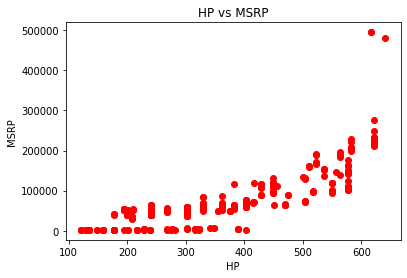

In [21]:
plt.scatter(X,y,color="red")
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

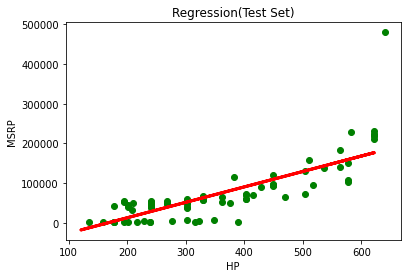

In [23]:
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

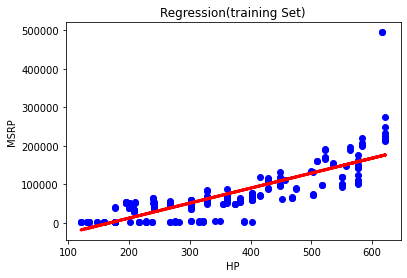

In [24]:
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [25]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred))

R2 score: 0.65


In [26]:
print('Mean Error :',mean_squared_error(y_test,y_pred))

Mean Error : 1833108741.6904762


In [27]:
def car_price(hp):
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

In [36]:
car_hp = int(input('Enter Mercedes cars Horse Power : '))
print('This Mercedes-Benz Price will be : ',int(car_price(car_hp)),'$')

Enter Mercedes cars Horse Power : 400
This Mercedes-Benz Price will be :  90383 $
